In [8]:
# import library and load dataset

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from mpl_toolkits.mplot3d import Axes3D

In [9]:
# load dataset
data_path = '../data/processed/data_cleaned_scaled_onehot.csv' 
data = pd.read_csv(data_path)

# form features and target
X = data.drop(['Target'], axis=1)
y = data['Target']
# numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
# X = data[numerical_cols]

outlier_fraction = 0.005

In [10]:
# perform LOF outlier detection on X
# use contamination=auto to automatically detect the percentage of outliers
lof = LocalOutlierFactor(n_neighbors=20, contamination=outlier_fraction)
outliers1 = lof.fit_predict(X)

print(outliers1)

# count outliers
outliers1 = pd.Series(outliers1)
print(outliers1.value_counts())


[1 1 1 ... 1 1 1]
 1    4401
-1      23
Name: count, dtype: int64


In [11]:
# perform Isolation Forest, compare results
iforest = IsolationForest(contamination=outlier_fraction)
outliers2 = iforest.fit_predict(X)

print(outliers2)

# count outliers
outliers2 = pd.Series(outliers2)
print(outliers2.value_counts())

[1 1 1 ... 1 1 1]
 1    4401
-1      23
Name: count, dtype: int64


In [12]:
# perform Elliptic Envelope
ee = EllipticEnvelope(contamination=outlier_fraction)
outliers3 = ee.fit_predict(X)

print(outliers3)

# count outliers
outliers3 = pd.Series(outliers3)
print(outliers3.value_counts())


c:\Users\james\anaconda3\envs\dm\lib\site-packages\sklearn\covariance\_robust_covariance.py:748: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


[1 1 1 ... 1 1 1]
 1    4401
-1      23
Name: count, dtype: int64


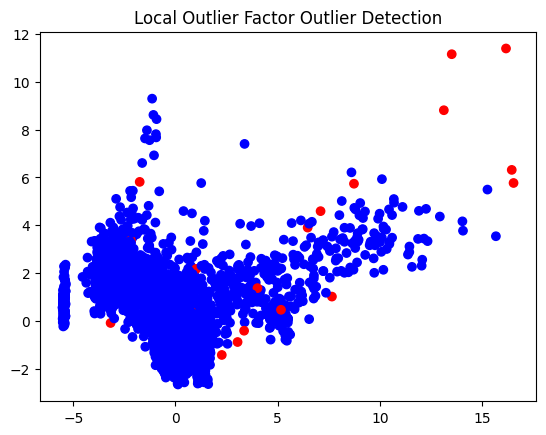

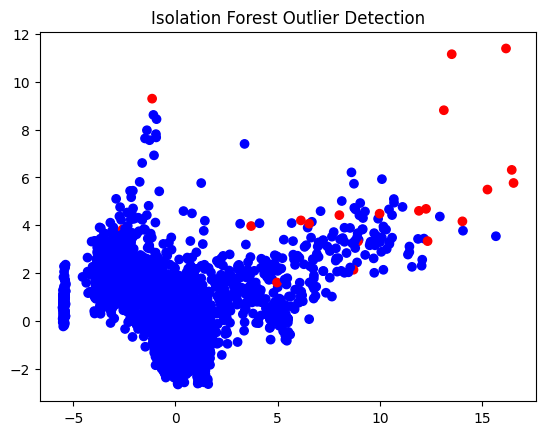

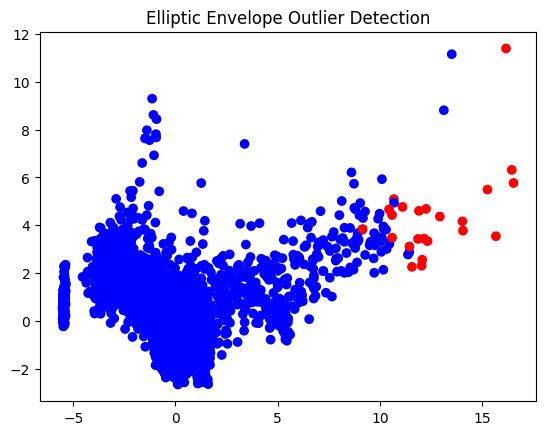

In [13]:
# set n_components to 2 for scatter plot
n_components = 2
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

# plot scatter of X_pca, color by outliers
if n_components == 2:
    colors = ['red' if x == -1 else 'blue' for x in outliers1]
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors)
    plt.title('Local Outlier Factor Outlier Detection')
    plt.show()

    # value 1 blue, value -1 red
    colors = ['red' if x == -1 else 'blue' for x in outliers2]
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors)
    plt.title('Isolation Forest Outlier Detection')
    plt.show()

    colors = ['red' if x == -1 else 'blue' for x in outliers3]
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors)
    plt.title('Elliptic Envelope Outlier Detection')
    plt.show()

if n_components==3:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    colors = ['red' if x == -1 else 'blue' for x in outliers1]
    ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=colors)
    plt.title('Local Outlier Factor')
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    colors = ['red' if x == -1 else 'blue' for x in outliers2]
    ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=colors)
    plt.title('Isolation Forest')
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    colors = ['red' if x == -1 else 'blue' for x in outliers3]
    ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=colors)
    plt.title('Elliptic Envelope')
    plt.show()




In [14]:
# print out the outliers for Elliptic Envelope

# load the data from the original dataset
data_original = '../data/processed/data_for_eda.csv'
data_original = pd.read_csv(data_original)

outliers3 = pd.Series(outliers3)
outliers3 = outliers3[outliers3 == -1]
print("Index of the Elliptic Envelope outlier: ", outliers3.index)

# print the detailed information of the outliers
print("Data for the outliers:")
print(data_original.loc[outliers3.index])


Index of the Elliptic Envelope outlier:  Index([ 180,  691,  707, 1441, 1515, 1724, 1894, 2256, 2342, 2476, 2639, 2863,
       2870, 2977, 3093, 3289, 3566, 3635, 3808, 3817, 3961, 3989, 4313],
      dtype='int64')
Data for the outliers:
      Marital status  Application mode  Application order  Course  \
180                1                43                  1    9853   
691                2                43                  1    9003   
707                2                39                  1    9003   
1441               1                 1                  1     171   
1515               1                 1                  1     171   
1724               1                 1                  1     171   
1894               1                18                  1     171   
2256               1                 7                  1      33   
2342               1                43                  1    9003   
2476               1                43                  2    9500   
263